# Main Library 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import tensorflow.keras as k

In [2]:
data = pd.read_csv(r"D:\Courses language programming\6.1_Deep Learning (Udemy)\PDF\CSV & IPNB\8 - StudentsPerformance(Project_2).csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


C:\Users\osama\AppData\Local\Temp\ipykernel_18688\3160528592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["math score"])


Text(0.5, 1.0, 'Distrubtion For Math Score')

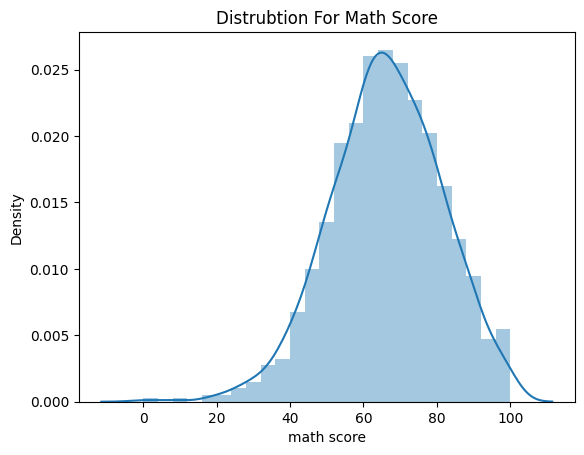

In [5]:
sns.distplot(data["math score"])
plt.title("Distrubtion For Math Score")

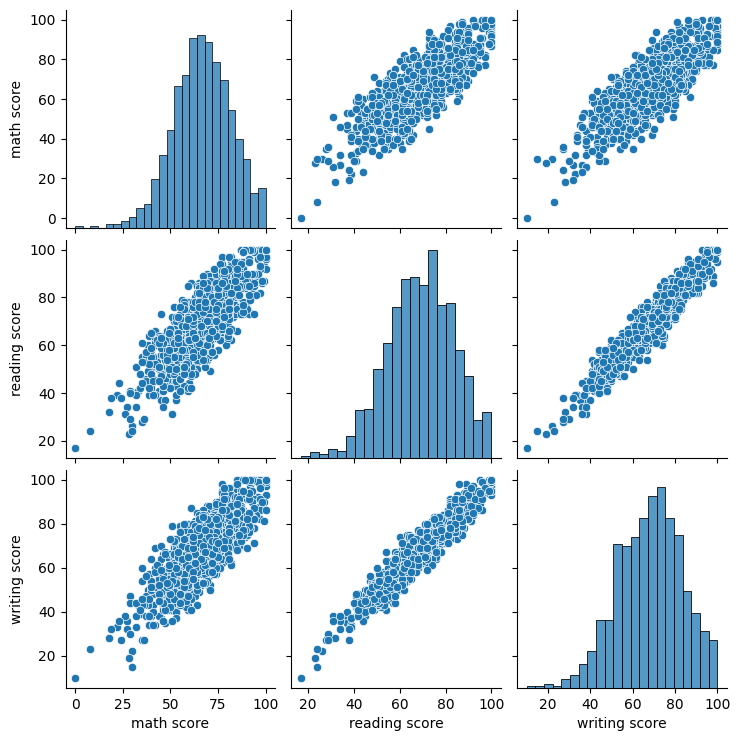

In [6]:
df = ["math score", "reading score", "writing score"]

sns.pairplot(data[df]);

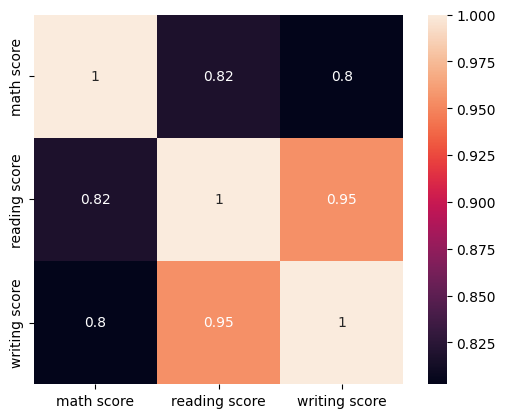

In [7]:
sns.heatmap(data[df].corr(), annot=True, square=True);

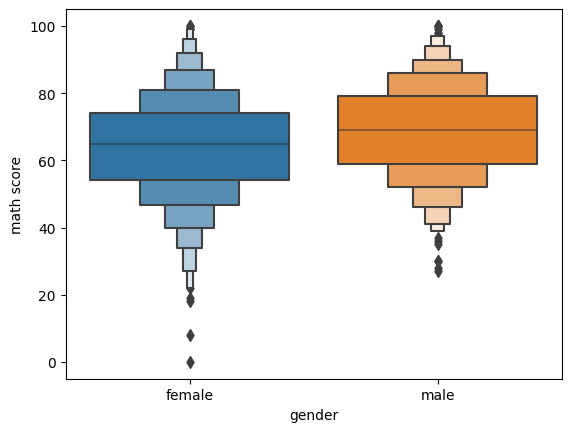

In [8]:

sns.boxenplot(x="gender", y="math score", data=data);

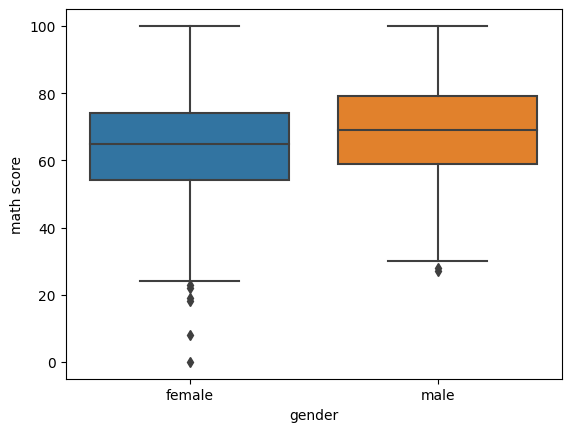

In [9]:
sns.boxplot(x="gender", y="math score", data=data);

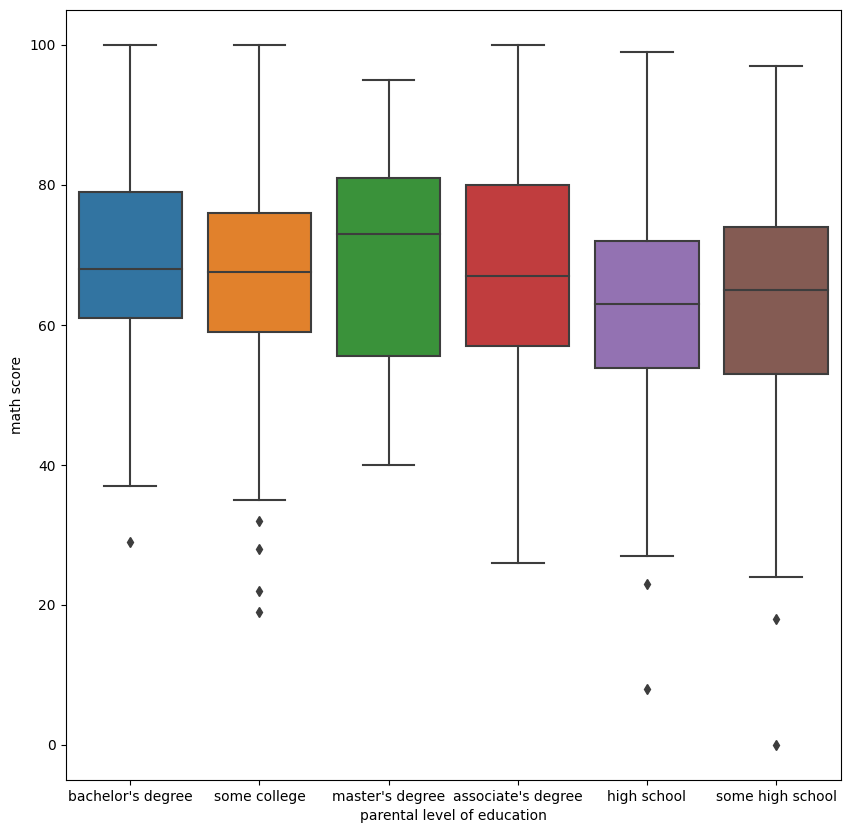

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="parental level of education", y="math score", data=data);

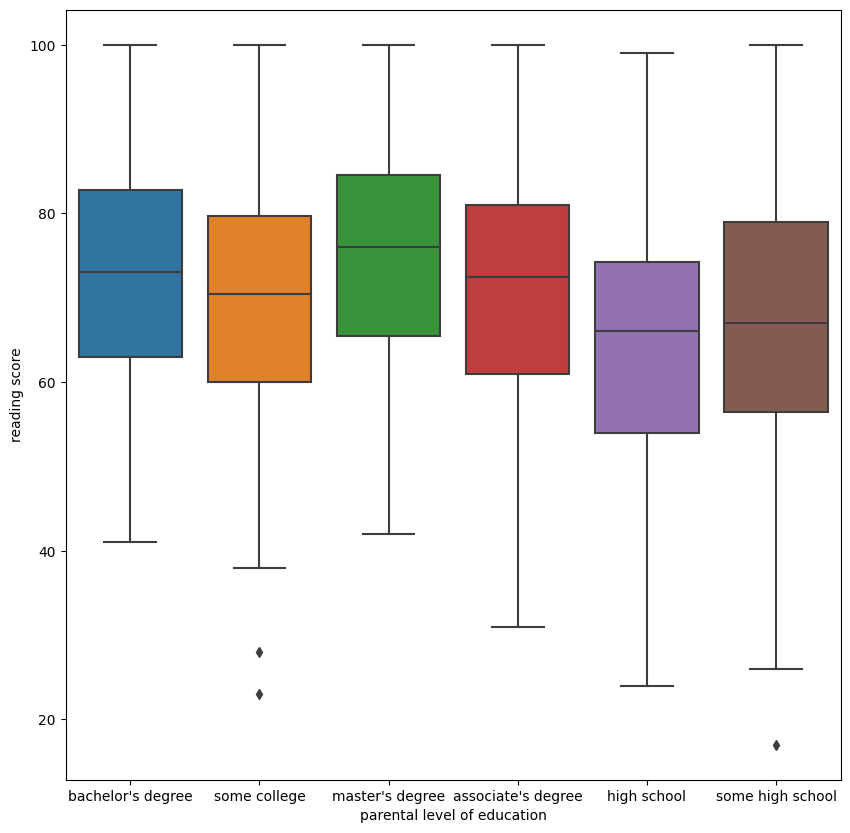

In [11]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="parental level of education", y="reading score", data=data);

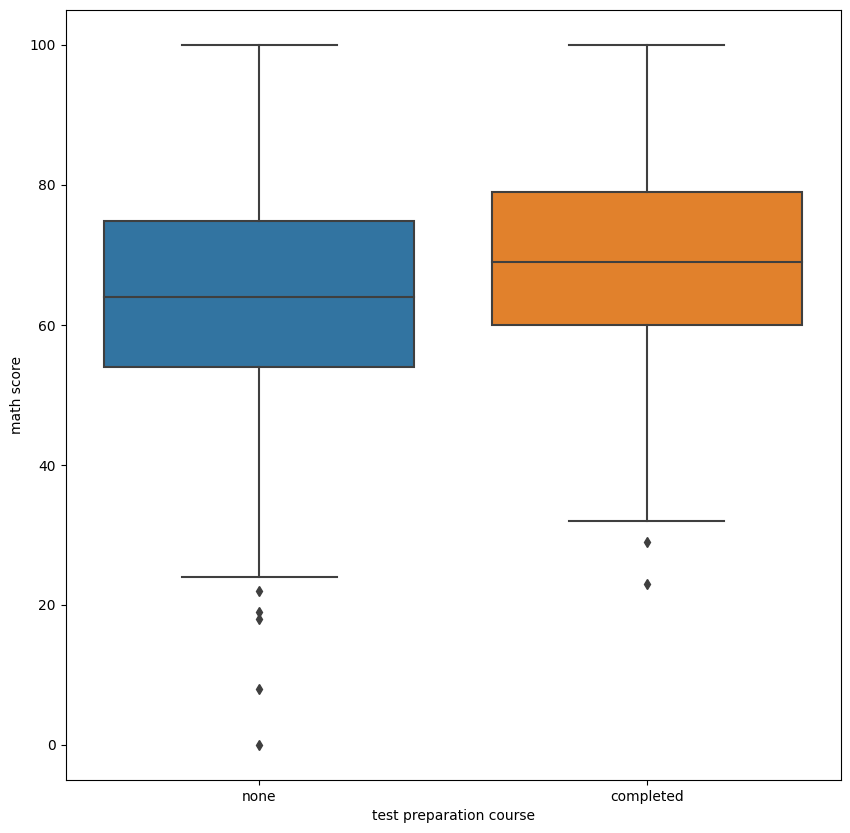

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="test preparation course", y="math score", data=data);

In [13]:
la = LabelEncoder()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = la.fit_transform(data[col])
    
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


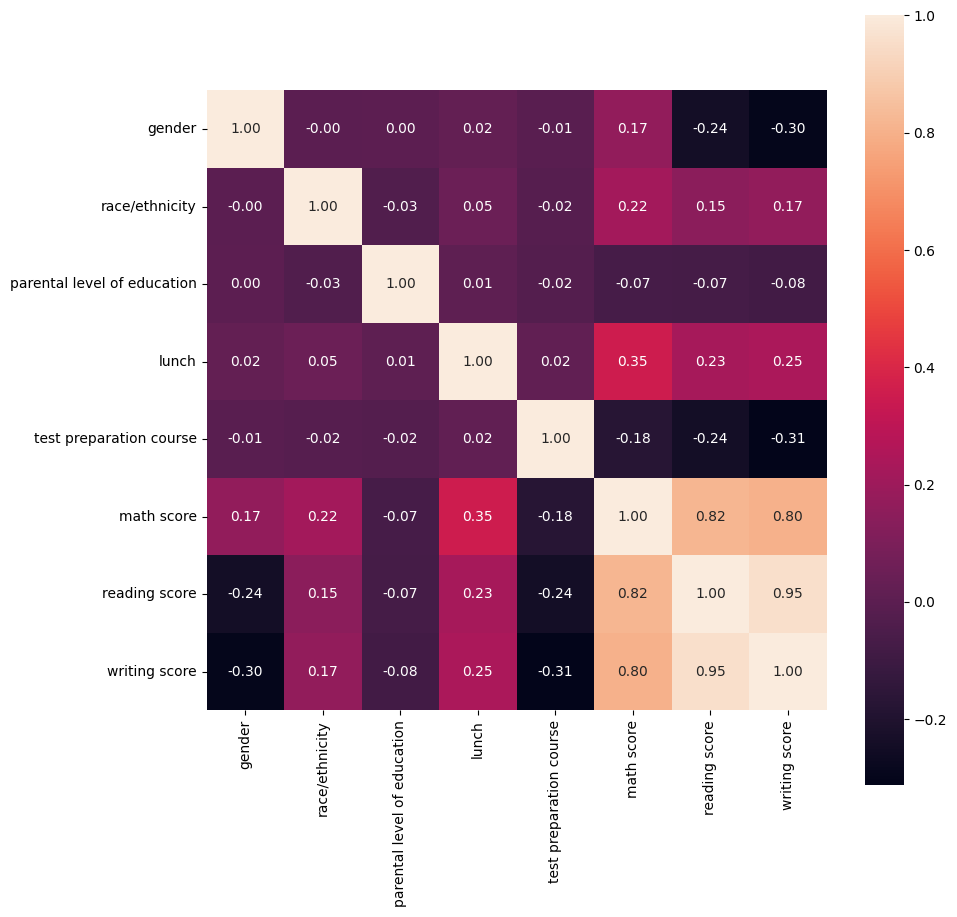

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, square=True, fmt="0.2f");

In [15]:
data["Average_score"] = (data["math score"] + data["writing score"] + data["reading score"]) / 3

In [16]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [17]:
X = data.drop(columns="Average_score", axis=1)
Y = data["Average_score"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

## Building Model

In [19]:
model_tf = k.models.Sequential()
model_tf.add(k.layers.Dense(256, activation="relu"))
model_tf.add(k.layers.Dense(128, activation="relu"))
model_tf.add(k.layers.Dense(64, activation="relu"))
model_tf.add(k.layers.Dense(16, activation="relu"))
model_tf.add(k.layers.Dense(1, activation="linear"))

model_tf.compile(optimizer="Adam", loss="mse")

In [20]:
history = model_tf.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
22/22 [==============================] - 1s 9ms/step - loss: 919.1788 - val_loss: 37.5377
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 39.4271 - val_loss: 0.1591
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 3.4445 - val_loss: 0.1560
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4586 - val_loss: 0.1562
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1245
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1062 - val_loss: 0.1121
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0991 - val_loss: 0.1019
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.0600
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0487
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.0288
Epoch

22/22 [==============================] - 0s 2ms/step - loss: 2.6436e-04 - val_loss: 0.0030
Epoch 81/500
22/22 [==============================] - 0s 2ms/step - loss: 2.5276e-04 - val_loss: 0.0028
Epoch 82/500
22/22 [==============================] - 0s 2ms/step - loss: 1.8991e-04 - val_loss: 0.0028
Epoch 83/500
22/22 [==============================] - 0s 2ms/step - loss: 1.8185e-04 - val_loss: 0.0028
Epoch 84/500
22/22 [==============================] - 0s 2ms/step - loss: 2.6809e-04 - val_loss: 0.0030
Epoch 85/500
22/22 [==============================] - 0s 2ms/step - loss: 2.8965e-04 - val_loss: 0.0030
Epoch 86/500
22/22 [==============================] - 0s 2ms/step - loss: 2.0090e-04 - val_loss: 0.0030
Epoch 87/500
22/22 [==============================] - 0s 2ms/step - loss: 2.5359e-04 - val_loss: 0.0029
Epoch 88/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3647e-04 - val_loss: 0.0030
Epoch 89/500
22/22 [==============================] - 0s 2ms/step - loss: 1.9

22/22 [==============================] - 0s 2ms/step - loss: 8.9020e-05 - val_loss: 0.0027
Epoch 159/500
22/22 [==============================] - 0s 2ms/step - loss: 1.1762e-04 - val_loss: 0.0028
Epoch 160/500
22/22 [==============================] - 0s 2ms/step - loss: 9.7214e-05 - val_loss: 0.0029
Epoch 161/500
22/22 [==============================] - 0s 2ms/step - loss: 3.2616e-04 - val_loss: 0.0028
Epoch 162/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 163/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 164/500
22/22 [==============================] - 0s 2ms/step - loss: 3.2224e-04 - val_loss: 0.0030
Epoch 165/500
22/22 [==============================] - 0s 2ms/step - loss: 2.3026e-04 - val_loss: 0.0032
Epoch 166/500
22/22 [==============================] - 0s 2ms/step - loss: 2.6410e-04 - val_loss: 0.0029
Epoch 167/500
22/22 [==============================] - 0s 2ms/step - loss: 1.

22/22 [==============================] - 0s 2ms/step - loss: 4.7623e-04 - val_loss: 0.0027
Epoch 238/500
22/22 [==============================] - 0s 2ms/step - loss: 4.1775e-04 - val_loss: 0.0035
Epoch 239/500
22/22 [==============================] - 0s 2ms/step - loss: 8.3278e-04 - val_loss: 0.0037
Epoch 240/500
22/22 [==============================] - 0s 2ms/step - loss: 1.7814e-04 - val_loss: 0.0026
Epoch 241/500
22/22 [==============================] - 0s 2ms/step - loss: 1.9731e-04 - val_loss: 0.0027
Epoch 242/500
22/22 [==============================] - 0s 2ms/step - loss: 8.6384e-04 - val_loss: 0.0068
Epoch 243/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 244/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 245/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0121
Epoch 246/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0059

22/22 [==============================] - 0s 2ms/step - loss: 3.3806e-04 - val_loss: 0.0021
Epoch 318/500
22/22 [==============================] - 0s 2ms/step - loss: 1.6094e-04 - val_loss: 0.0024
Epoch 319/500
22/22 [==============================] - 0s 2ms/step - loss: 2.5416e-04 - val_loss: 0.0022
Epoch 320/500
22/22 [==============================] - 0s 2ms/step - loss: 4.8016e-04 - val_loss: 0.0024
Epoch 321/500
22/22 [==============================] - 0s 2ms/step - loss: 1.8862e-04 - val_loss: 0.0021
Epoch 322/500
22/22 [==============================] - 0s 2ms/step - loss: 1.1528e-04 - val_loss: 0.0022
Epoch 323/500
22/22 [==============================] - 0s 2ms/step - loss: 2.2036e-04 - val_loss: 0.0023
Epoch 324/500
22/22 [==============================] - 0s 2ms/step - loss: 2.5146e-04 - val_loss: 0.0021
Epoch 325/500
22/22 [==============================] - 0s 2ms/step - loss: 1.0531e-04 - val_loss: 0.0022
Epoch 326/500
22/22 [==============================] - 0s 2ms/step - 

22/22 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0031
Epoch 397/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0998 - val_loss: 0.0035
Epoch 398/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 399/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0560
Epoch 400/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.0027
Epoch 401/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0398
Epoch 402/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1647 - val_loss: 0.3426
Epoch 403/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0381
Epoch 404/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0367
Epoch 405/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.0167
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.1384 - val_loss: 0.0081
Epoch 476/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0139
Epoch 477/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 478/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 479/500
22/22 [==============================] - 0s 2ms/step - loss: 2.1654e-04 - val_loss: 0.0017
Epoch 480/500
22/22 [==============================] - 0s 2ms/step - loss: 1.6276e-04 - val_loss: 0.0014
Epoch 481/500
22/22 [==============================] - 0s 2ms/step - loss: 2.6369e-04 - val_loss: 0.0017
Epoch 482/500
22/22 [==============================] - 0s 2ms/step - loss: 3.4215e-04 - val_loss: 0.0014
Epoch 483/500
22/22 [==============================] - 0s 2ms/step - loss: 1.3312e-04 - val_loss: 0.0014
Epoch 484/500
22/22 [==============================] - 0s 2ms/step - loss: 1.5336e-04

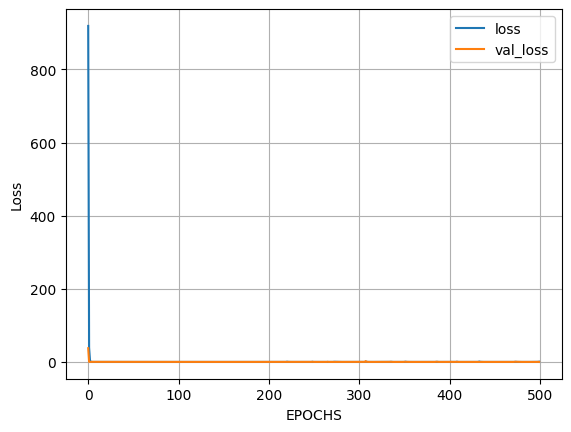

In [21]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.grid()

In [22]:
prediction = model_tf.predict(x_test)

10/10 [==============================] - 0s 1ms/step


In [23]:
print(f"The mean Squered Error is ==> {mean_squared_error(prediction, y_test)}")

The mean Squered Error is ==> 0.0050211371029406215


In [25]:
print(f"The mean Squered Error is ==> {r2_score(prediction, y_test)}")

The mean Squered Error is ==> 0.9999776517956391
